In [1]:
import matplotlib as mpl #画图
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import os
import sys
import time
import tensorflow as tf
import pandas as pd
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.18.1
pandas 0.24.2
sklearn 0.20.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all),(x_test, y_test) = fashion_mnist.load_data()
x_valid ,x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


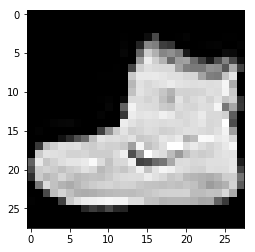

In [3]:
def show_single_img(img_arr):
    plt.imshow(img_arr, cmap='gray')
    plt.show()
show_single_img(x_valid[0])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform( # fit的意思是把这个过程中所有的均值和方差记录下来。
    # (数量, 28, 28, 维度)
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = 3,
                             padding = 'same',
                             activation = 'relu',
                             input_shape = (28, 28, 1)))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = 3,
                             padding = 'same',
                             activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = 2))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = 3,
                             padding = 'same',
                             activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = 2))
model.add(keras.layers.Conv2D(filters = 128, kernel_size = 3,
                             padding = 'same',
                             activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = 2))
model.add(keras.layers.Conv2D(filters = 128, kernel_size = 3,
                             padding = 'same',
                             activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = 2))
# 在连接全连接层之前/做一个flatten
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(10, activation = "softmax"))
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = "sgd",
             metrics = ["accuracy"])# 衡量的一个指标<各类召回率的算术平均值>

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0

In [7]:
# logdir = '.\cnn-callbacks'
# if not os.path.exists(logdir):
#     os.mkdir(logdir)
# output_model_file = os.path.abspath(os.path.join(logdir,"fashion_mnist_model.h5"))
# callbacks = [
#     keras.callbacks.TensorBoard(logdir),# 保留训练过程中各个参数的变化曲线，例如损失函数的变化曲线。以及保留模型结构图。
#     keras.callbacks.ModelCheckpoint(output_model_file,
#                                    save_best_only = True) #设置保留模型。保留最佳模型
# ]
history = model.fit(x_train_scaled, y_train, epochs=10,
            validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 25s 449us/sample - loss: 0.8022 - accuracy: 0.7159 - val_loss: 0.4828 - val_accuracy: 0.8344
Epoch 2/10
55000/55000 [==============================] - 11s 205us/sample - loss: 0.4334 - accuracy: 0.8421 - val_loss: 0.3668 - val_accuracy: 0.8664
Epoch 3/10
55000/55000 [==============================] - 11s 205us/sample - loss: 0.3629 - accuracy: 0.8682 - val_loss: 0.3279 - val_accuracy: 0.8810
Epoch 4/10
55000/55000 [==============================] - 11s 206us/sample - loss: 0.3264 - accuracy: 0.8812 - val_loss: 0.3154 - val_accuracy: 0.8808
Epoch 5/10
55000/55000 [==============================] - 11s 207us/sample - loss: 0.2987 - accuracy: 0.8910 - val_loss: 0.3050 - val_accuracy: 0.8872
Epoch 6/10
55000/55000 [==============================] - 11s 205us/sample - loss: 0.2800 - accuracy: 0.8975 - val_loss: 0.2836 - val_accuracy: 0.8950
Epoch 7/10
55000/55000 [=====================

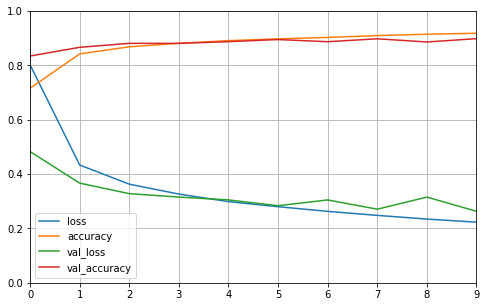

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True) 
    plt.gca().set_ylim(0, 1) 
    plt.show()
plot_learning_curves(history)